In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
nb_dir = '/home/alon/Repos/'
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path
#import Utilities as utl
import matplotlib.pyplot as plt

In [2]:
fpath = '/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_HighMOI_Dec122019_2019Dec12/acq_2'
from oyLabCode import Metadata
MD = Metadata(fpath)

loaded Metadata from pickle file


In [4]:
MD()

,FlatField,Position,group,acq,frame,TimestampImage,XY,PixelSize,PlateType,Z,Zindex,Exposure,Channel,Marker,Fluorophore,Skip,TimestampFrame,filename,root_pth
0,NaN,B02,B02,acq_2,1,737771.600179,"[-83110.0, -3142.0]",0.547619,Costar96 (3904),12.375,1,30,DeepBlue,Nuclei,Hoechst,1,737771.600206,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,Pos0/img_B02_000000001_000000000_DeepBlue_000_...
1,NaN,B02,B02,acq_2,1,737771.600206,"[-83110.0, -3142.0]",0.547619,Costar96 (3904),12.375,1,5,Green,Prolif,CellTrackerGreen,1,737771.600206,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,Pos0/img_B02_000000001_000000000_Green_000_001...
2,NaN,B02,B02,acq_2,1,737771.600233,"[-83110.0, -3142.0]",0.547619,Costar96 (3904),12.375,1,115,Red,HSV-1,mCherry,1,737771.600206,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,Pos0/img_B02_000000001_000000000_Red_000_001.tif
3,NaN,C02,C02,acq_2,1,737771.600296,"[-83111.0, 5880.0]",0.547619,Costar96 (3904),9.475,1,30,DeepBlue,Nuclei,Hoechst,1,737771.600323,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,Pos1/img_C02_000000001_000000000_DeepBlue_000_...
4,NaN,C02,C02,acq_2,1,737771.600322,"[-83111.0, 5880.0]",0.547619,Costar96 (3904),9.475,1,5,Green,Prolif,CellTrackerGreen,1,737771.600323,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,Pos1/img_C02_000000001_000000000_Green_000_001...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26095,NaN,F11,F11,acq_2,145,737773.607169,"[-1931.0, 32941.0]",0.547619,Costar96 (3904),30.450,1,5,Green,Prolif,CellTrackerGreen,1,737773.607169,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,Pos58/img_F11_000000145_000000144_Green_000_00...
26096,NaN,F11,F11,acq_2,145,737773.607196,"[-1931.0, 32941.0]",0.547619,Costar96 (3904),30.450,1,115,Red,HSV-1,mCherry,1,737773.607169,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,Pos58/img_F11_000000145_000000144_Red_000_001.tif
26097,NaN,G11,G11,acq_2,145,737773.607261,"[-1931.0, 41960.0]",0.547619,Costar96 (3904),16.375,1,30,DeepBlue,Nuclei,Hoechst,1,737773.607289,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,Pos59/img_G11_000000145_000000144_DeepBlue_000...
26098,NaN,G11,G11,acq_2,145,737773.607286,"[-1931.0, 41960.0]",0.547619,Costar96 (3904),16.375,1,5,Green,Prolif,CellTrackerGreen,1,737773.607289,/bigstore/Images2019/Jen/NFkBDynamics/TNFTitr_...,Pos59/img_G11_000000145_000000144_Green_000_00...


In [153]:
img = MD.stkread(Position=MD.posnames[10],frame=[7,8,9],Channel='DeepBlue')

opening img_F03_000000009_000000008_DeepBlue_000_001.tif

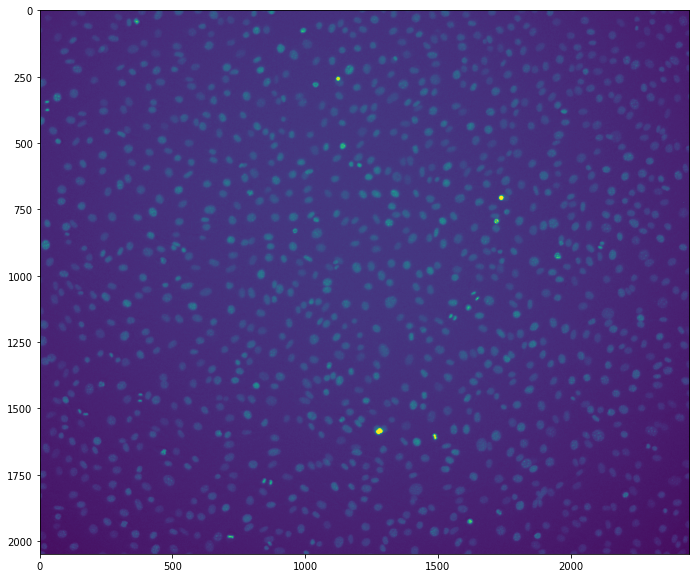

In [116]:
#img = plt.imread('/home/alon/Repos/steerable/testdata/dna.tif').astype(np.float64)


plt.figure(figsize=[12,10])
plt.imshow(img)

In [155]:
from oyLabCode import Processing as Proc

L = Proc.improcutils.segmentation._segment_nuclei_cellpose(img)

>>>> using CPU
processing 1 image(s)


In [159]:
img.tolist()

KeyboardInterrupt: 

In [109]:
import steerable
import matplotlib.cm as cm

M = 4  # 4th order ridge detector
sigma = 5 

sd = steerable.Detector2D(img, M, sigma)
response, orientation = sd.filter()
nms = sd.get_nms()
composite = sd.make_composite(response, orientation)

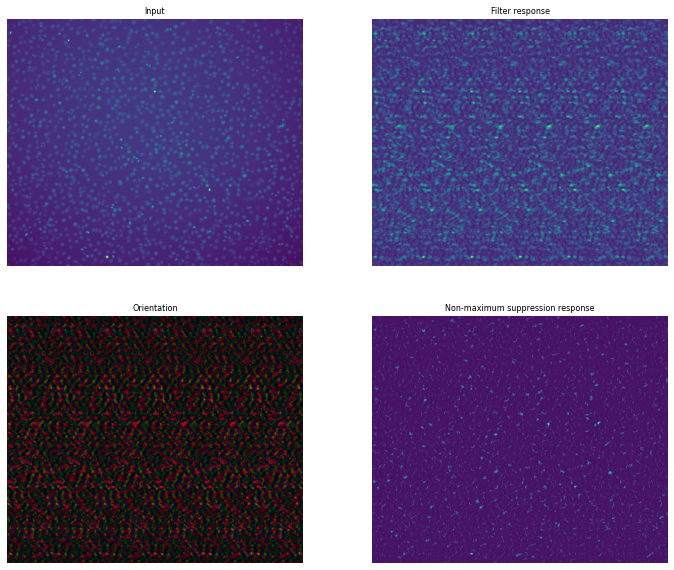

In [83]:
fig = plt.figure(figsize=[12,10])
args = {'fontsize':8}
ax = fig.add_subplot(221); ax.imshow(img); ax.set_title('Input', **args); ax.axis('off');
ax = fig.add_subplot(222); ax.imshow(response); ax.set_title('Filter response', **args); ax.axis('off');
ax = fig.add_subplot(223); ax.imshow(composite); ax.set_title('Orientation', **args); ax.axis('off');
ax = fig.add_subplot(224); ax.imshow(nms); ax.set_title('Non-maximum suppression response', **args); ax.axis('off');
plt.show()

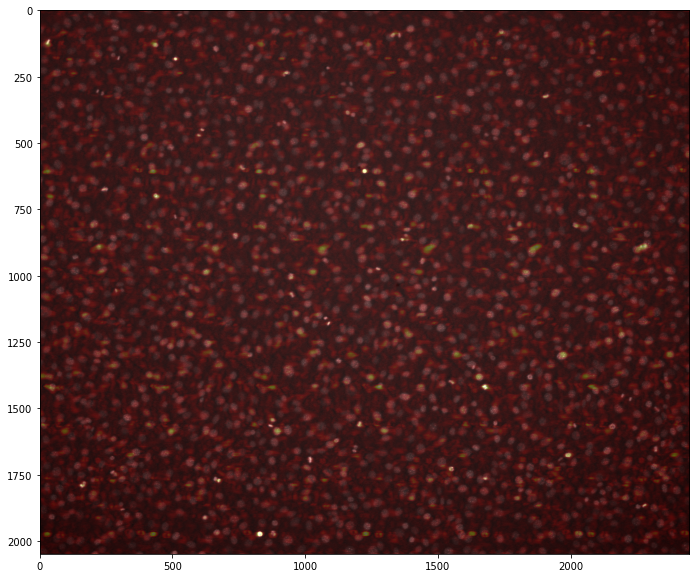

In [110]:
fig = plt.figure(figsize=[12,10])
plt.imshow(img,cmap='gray')
plt.imshow(response,alpha=0.3, cmap='hot')

In [117]:
from skimage.transform import hough_line, hough_line_peaks

tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
h, theta, d = hough_line(img, theta=tested_angles)


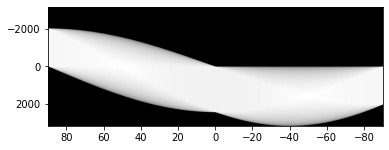

In [131]:

plt.imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/100)


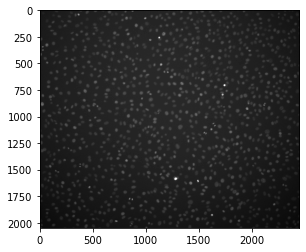

In [134]:
plt.imshow(img, cmap=cm.gray)




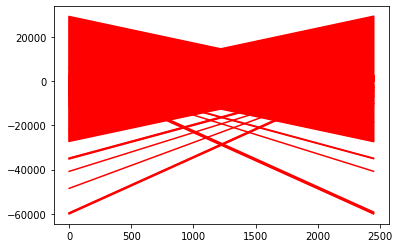

In [141]:
origin = np.array((0, img.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    plt.plot(origin, (y0, y1), '-r')

In [136]:
zip(*hough_line_peaks(h, theta, d))

SyntaxError: can't use starred expression here (<ipython-input-139-54b5ca4bf341>, line 4)